Importo las librerías necesarias.

In [58]:
import pandas as pd
import csv

from pandas import DataFrame
import pickle

import matplotlib.pyplot as plt
import numpy as np
import os
import math

#from sklearn.metrics.pairwise import cosine_similarity

Guardo los nombres de los ficheros en un diccionario para podr acceder a ellos facilmente.  
Por cada video hay un par de ficheros 'csv' y 'df' con el mismo nombre, por lo que puedo omitir la extensión y así no guardar el mismo nombre dos veces.

In [59]:
filenames = {
    "cruz_ej": {
        "1" : [
            "cruz_ej1_0.pos",
            "cruz_ej1_3.pos",
            "cruz_ej1_4.pos",
            "cruz_ej1_8.pos",
            "cruz_ej1_12.pos",
            "cruz_ej1_13.pos",
            "cruz_ej1_15.pos",
            "cruz_ej1_21.pos",
            "cruz_ej1_24.pos",
            "cruz_ej1_27.pos",
            "cruz_ej1_35.pos",
            "cruz_ej1_40.pos",
            "cruz_ej1_44.pos",
            "cruz_ej1_48.pos",
            "cruz_ej1_52.pos",
            "cruz_ej1_55.pos",
            "cruz_ej1_57.pos",
            ],
        "2" : [
            "cruz_ej2_1.pos",
            "cruz_ej2_9.pos",
            "cruz_ej2_5.pos",
            "cruz_ej2_14.pos",
            "cruz_ej2_19.pos",
            "cruz_ej2_22.pos",
            "cruz_ej2_23.pos",
            "cruz_ej2_25.pos",
            "cruz_ej2_26.pos",
            "cruz_ej2_28.pos",
            "cruz_ej2_29.pos",
            "cruz_ej2_36.pos",
            "cruz_ej2_37.pos",
            "cruz_ej2_41.pos",
            "cruz_ej2_45.pos",
            "cruz_ej2_47.pos",
            "cruz_ej2_49.pos",
            "cruz_ej2_53.pos",
            "cruz_ej2_60.pos",
        ],
        "3" : [
            "cruz_ej3_2.pos",
            "cruz_ej3_6.pos",
            "cruz_ej3_7.pos",
            "cruz_ej3_10.pos",
            "cruz_ej3_11.pos",
            "cruz_ej3_16.pos",
            "cruz_ej3_17.pos",
            "cruz_ej3_18.pos",
            "cruz_ej3_20.pos",
            "cruz_ej3_43.pos",
            "cruz_ej3_59.pos",
        ],
        "4" : [
            "cruz_ej4_30.pos",
            "cruz_ej4_31.pos",
            "cruz_ej4_32.pos",
            "cruz_ej4_33.pos",
            "cruz_ej4_34.pos",
            "cruz_ej4_38.pos",
            "cruz_ej4_39.pos",
            "cruz_ej4_42.pos",
            "cruz_ej4_46.pos",
            "cruz_ej4_50.pos",
            "cruz_ej4_51.pos",
            "cruz_ej4_54.pos",
            "cruz_ej4_56.pos",
            "cruz_ej4_58.pos",
        ]
    },
    "pelota" : {
        "1" : [
            "pelota1_4.pos",
            "pelota1_7.pos",
            "pelota1_0.pos",
            "pelota1_1.pos",
            "pelota1_11.pos",
            "pelota1_14.pos",
            "pelota1_17.pos",
            "pelota1_20.pos",
            "pelota1_23.pos",
            "pelota1_24.pos",
            "pelota1_28.pos",
            "pelota1_30.pos",
            "pelota1_31.pos",
        ],
        "2": [
            "pelota2_2.pos",
            "pelota2_5.pos",
            "pelota2_8.pos",
            "pelota2_12.pos",
            "pelota2_15.pos",
            "pelota2_18.pos",
            "pelota2_21.pos",
            "pelota2_29.pos",
            "pelota2_32.pos",
        ]
    }
}

Guardo las rutas de los archivos en dos listas.

In [60]:
'''
Datos
'''
data_path = "../datos/"
path_df = data_path + "DataFrames"
path_csv = data_path + "CSV"

dataframes = []
csvs = []
for i in filenames["pelota"]["1"]:
    actual_df = path_df + os.sep + i + ".df"
    actual_csv = path_csv + os.sep + i + ".csv"
    dataframes.append(actual_df)
    csvs.append(actual_csv)

Función para abrir archivos csv.

In [61]:
def open_csv(csv_name):
    mycsv = pd.read_csv(csv_name)
    return mycsv


csv_name = csvs[0]
mycsv = open_csv(csv_name)
display(mycsv)
print(mycsv.columns)

,Unnamed: 0,frame,nariz_x,cuello_x,hombroI_x,hombroD_x,codoI_x,codoD_x,manoI_x,manoD_x,...,angCodoI,angCodoD,angHombroI,angHombroD,angCaderaI,angCaderaD,angCaderaTorsoI,angCaderaTorsoD,angRodillaI,angRodillaD
0,0,0,823.10300,813.982788,850.94366,777.02200,860.54390,773.18190,849.02356,791.42230,...,351.123406,338.792553,262.475378,266.070006,255.614874,265.557338,89.550363,90.449702,206.161013,186.801142
1,1,1,822.20140,814.046143,850.98490,777.10730,860.57940,773.26950,849.06604,791.49896,...,351.141971,338.879651,263.239492,265.287222,254.391375,266.590860,90.558065,89.441870,206.497290,186.842724
2,2,2,822.47235,814.325439,851.22580,777.42510,859.85190,772.63290,848.35050,791.80190,...,350.536350,338.588701,264.274808,264.487180,255.689171,265.516935,88.961881,91.038061,206.211829,188.157495
3,3,3,822.46814,814.318054,851.23303,777.40310,859.86250,772.60890,848.35657,791.78550,...,350.431351,338.576459,265.112033,263.741648,255.916701,265.535343,88.975708,91.024292,205.988018,188.145556
4,4,4,822.47670,814.343872,851.18050,777.50730,859.79170,772.72340,848.31010,791.85925,...,350.536184,339.051735,264.274655,264.542863,256.949812,264.478856,87.951918,92.048073,205.876208,188.088332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,995,845.71510,822.311157,857.17820,787.44410,869.59670,785.53350,860.99927,838.07294,...,294.015475,266.364821,262.507335,264.479585,256.211323,292.154443,87.522139,92.477861,195.732011,218.108721
996,996,996,845.51605,823.015015,858.92084,787.10925,876.15564,785.19430,880.94305,836.89860,...,196.297673,268.356080,245.905222,265.395056,255.809522,290.507034,87.575455,92.424545,196.757126,213.946431
997,997,997,844.91570,821.998413,857.32930,786.66760,867.83300,786.66760,864.96840,839.18640,...,202.547460,93.134540,260.758695,266.119184,256.017209,289.368751,87.245201,92.754799,196.545978,212.044306
998,998,998,844.74310,822.249878,857.18620,787.31354,862.92914,783.48486,869.62930,838.04297,...,103.576984,269.146354,268.503079,262.899905,257.503910,287.882739,87.468264,92.531736,194.421530,209.987886


Index(['Unnamed: 0', 'frame', 'nariz_x', 'cuello_x', 'hombroI_x', 'hombroD_x',
       'codoI_x', 'codoD_x', 'manoI_x', 'manoD_x', 'caderaI_x', 'caderaD_x',
       'caderaM_x', 'rodillaI_x', 'rodillaD_x', 'tobilloI_x', 'tobilloD_x',
       'nariz_y', 'cuello_y', 'hombroI_y', 'hombroD_y', 'codoI_y', 'codoD_y',
       'manoI_y', 'manoD_y', 'caderaI_y', 'caderaD_y', 'caderaM_y',
       'rodillaI_y', 'rodillaD_y', 'tobilloI_y', 'tobilloD_y', 'angCuelloI',
       'angCuelloD', 'angCodoI', 'angCodoD', 'angHombroI', 'angHombroD',
       'angCaderaI', 'angCaderaD', 'angCaderaTorsoI', 'angCaderaTorsoD',
       'angRodillaI', 'angRodillaD'],
      dtype='object')


Función para abrir archivos df.

In [62]:
def open_dataframe(df_name):
        with open(df_name, 'rb') as fp:
                df = pd.read_pickle(fp)
        return df

df_name = dataframes[0]
df = open_dataframe(df_name)

display(df)
print(df.columns)
del df

,frame,nariz_x,cuello_x,hombroI_x,hombroD_x,codoI_x,codoD_x,manoI_x,manoD_x,caderaI_x,...,angCodoI,angCodoD,angHombroI,angHombroD,angCaderaI,angCaderaD,angCaderaTorsoI,angCaderaTorsoD,angRodillaI,angRodillaD
0,0,823.103027,813.982788,850.943665,777.021973,860.543884,773.181885,849.023560,791.422302,845.183533,...,351.123406,338.792553,262.475378,266.070006,255.614874,265.557338,89.550363,90.449702,206.161013,186.801142
1,1,822.201416,814.046143,850.984924,777.107300,860.579407,773.269470,849.066040,791.498962,845.228210,...,351.141971,338.879651,263.239492,265.287222,254.391375,266.590860,90.558065,89.441870,206.497290,186.842724
2,2,822.472351,814.325439,851.225830,777.425110,859.851929,772.632874,848.350525,791.801880,844.516724,...,350.536350,338.588701,264.274808,264.487180,255.689171,265.516935,88.961881,91.038061,206.211829,188.157495
3,3,822.468140,814.318054,851.233032,777.403076,859.862488,772.608887,848.356567,791.785522,844.521240,...,350.431351,338.576459,265.112033,263.741648,255.916701,265.535343,88.975708,91.024292,205.988018,188.145556
4,4,822.476685,814.343872,851.180481,777.507324,859.791687,772.723389,848.310120,791.859253,844.482971,...,350.536184,339.051735,264.274655,264.542863,256.949812,264.478856,87.951918,92.048073,205.876208,188.088332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,845.715088,822.311157,857.178223,787.444092,869.596680,785.533508,860.999268,838.072937,845.715088,...,294.015475,266.364821,262.507335,264.479585,256.211323,292.154443,87.522139,92.477861,195.732011,218.108721
996,996,845.516052,823.015015,858.920837,787.109253,876.155640,785.194275,880.943054,836.898621,846.473511,...,196.297673,268.356080,245.905222,265.395056,255.809522,290.507034,87.575455,92.424545,196.757126,213.946431
997,997,844.915710,821.998413,857.329285,786.667603,867.833008,786.667603,864.968384,839.186401,845.870605,...,202.547460,93.134540,260.758695,266.119184,256.017209,289.368751,87.245201,92.754799,196.545978,212.044306
998,998,844.743103,822.249878,857.186218,787.313538,862.929138,783.484863,869.629272,838.042969,846.657471,...,103.576984,269.146354,268.503079,262.899905,257.503910,287.882739,87.468264,92.531736,194.421530,209.987886


Index(['frame', 'nariz_x', 'cuello_x', 'hombroI_x', 'hombroD_x', 'codoI_x',
       'codoD_x', 'manoI_x', 'manoD_x', 'caderaI_x', 'caderaD_x', 'caderaM_x',
       'rodillaI_x', 'rodillaD_x', 'tobilloI_x', 'tobilloD_x', 'nariz_y',
       'cuello_y', 'hombroI_y', 'hombroD_y', 'codoI_y', 'codoD_y', 'manoI_y',
       'manoD_y', 'caderaI_y', 'caderaD_y', 'caderaM_y', 'rodillaI_y',
       'rodillaD_y', 'tobilloI_y', 'tobilloD_y', 'angCuelloI', 'angCuelloD',
       'angCodoI', 'angCodoD', 'angHombroI', 'angHombroD', 'angCaderaI',
       'angCaderaD', 'angCaderaTorsoI', 'angCaderaTorsoD', 'angRodillaI',
       'angRodillaD'],
      dtype='object')


Creo tres diccionarios:
- Uno con los nombres de partes del cuerpo.   
- Otro para los ángulos.  
- Otro para las uniones de los puntos del cuerpo.  

In [63]:
body = ['nariz', 'cuello', 'hombroI', 'hombroD',
       'codoI', 'codoD', 'manoI', 'manoD', 'caderaI', 'caderaD',
       'caderaM', 'rodillaI', 'rodillaD', 'tobilloI', 'tobilloD']

ang = ['angCuelloI',
       'angCuelloD', 'angCodoI', 'angCodoD', 'angHombroI', 'angHombroD',
       'angCaderaI', 'angCaderaD', 'angCaderaTorsoI', 'angCaderaTorsoD',
       'angRodillaI', 'angRodillaD']

bones_names = [
    ['nariz', 'cuello'],
    ['cuello', 'hombroI'],
    ['cuello', 'hombroD'],
    ['cuello', 'caderaM'],
    ['hombroI', 'codoI'],
    ['hombroD', 'codoD'],
    ['codoI', 'manoI'],
    ['codoD' , 'manoD'],
    ['caderaI', 'caderaM'],
    ['caderaM', 'caderaD'],
    ['caderaI', 'rodillaI'],
    ['caderaD', 'rodillaD'],
    ['rodillaI', 'tobilloI'],
    ['rodillaD', 'tobilloD'],
    ]

Funciones para obtener las posiciones, establecerlas y para dibujar los puntos.

In [64]:
def get_position(df, body_part, frame):
    x = df.loc[frame, body_part + "_x"]
    y = df.loc[frame, body_part + "_y"] 
    return x, y

def set_position(df, body_part, frame, positions):
    df.loc[frame, body_part + "_x"] = positions[0]
    df.loc[frame, body_part + "_y"] = positions[1] 

def get_positions_from_df(df, frame):
    positions = []
    positionsx = []
    positionsy = []
    for part in body:
        x, y = get_position(df, part, frame)
        positionsx.append(x) 
        positionsy.append(y)
    
    positions.append(positionsx)
    positions.append(positionsy)
    positions = np.array(positions).reshape(2, len(body))
    return positions

def set_positions_from_df(df, frame, positions):
    x, y = positions
    for i in range(len(x)):
        set_position(df, body[i], frame, (x[i], y[i]))
    return df

def plot_point(positions, show: bool = True):
    x, y = positions
    plt.scatter(x,y, marker='o')
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title('Pose')

    if show:
        plt.show()
   

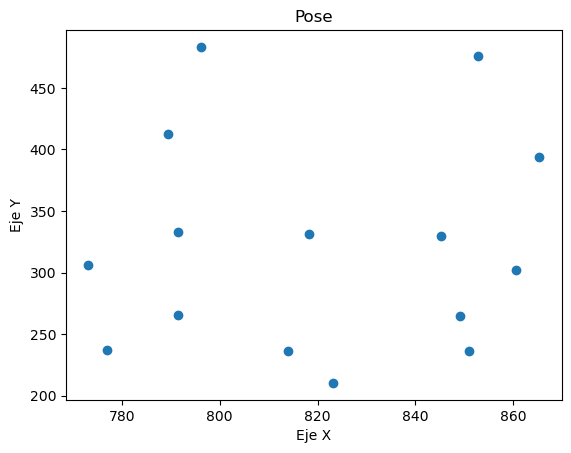

[[823.103      813.98278809 850.94366    777.022      860.5439
  773.1819     849.02356    791.4223     845.18353    791.4223
  818.30291748 865.344      789.50226    852.86365    796.2224    ]
 [210.31345    236.64770508 236.1689     237.1265     302.24393
  306.07434    264.8972     265.85477    330.0146     332.88742
  331.45098877 394.1744     412.369      475.57117    483.23206   ]]
[[823.103      210.31345   ]
 [813.98278809 236.64770508]
 [850.94366    236.1689    ]
 [777.022      237.1265    ]
 [860.5439     302.24393   ]
 [773.1819     306.07434   ]
 [849.02356    264.8972    ]
 [791.4223     265.85477   ]
 [845.18353    330.0146    ]
 [791.4223     332.88742   ]
 [818.30291748 331.45098877]
 [865.344      394.1744    ]
 [789.50226    412.369     ]
 [852.86365    475.57117   ]
 [796.2224     483.23206   ]]


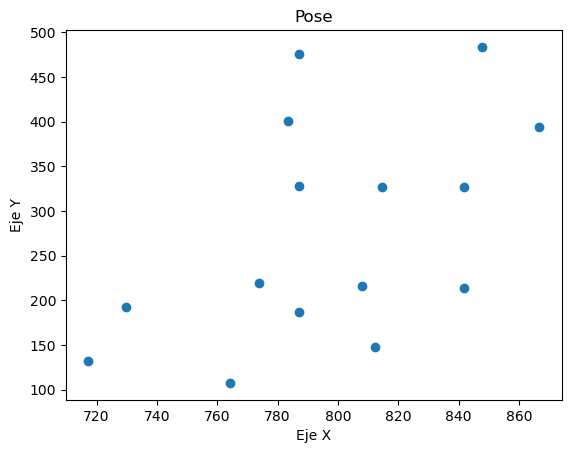

[[787.2676     807.87097168 841.8906     773.8513     812.1833
  729.7696     764.2683     717.3117     841.8906     787.2676
  814.57910156 866.8064     783.4343     847.6404     787.2676    ]
 [187.25789    216.52783203 214.12866    218.92702    147.91138
  192.05623    107.60521    131.59697    326.41013    328.3295
  327.36981201 393.5871     401.26447    483.79617    476.1188    ]]
[[787.2676     187.25789   ]
 [807.87097168 216.52783203]
 [841.8906     214.12866   ]
 [773.8513     218.92702   ]
 [812.1833     147.91138   ]
 [729.7696     192.05623   ]
 [764.2683     107.60521   ]
 [717.3117     131.59697   ]
 [841.8906     326.41013   ]
 [787.2676     328.3295    ]
 [814.57910156 327.36981201]
 [866.8064     393.5871    ]
 [783.4343     401.26447   ]
 [847.6404     483.79617   ]
 [787.2676     476.1188    ]]


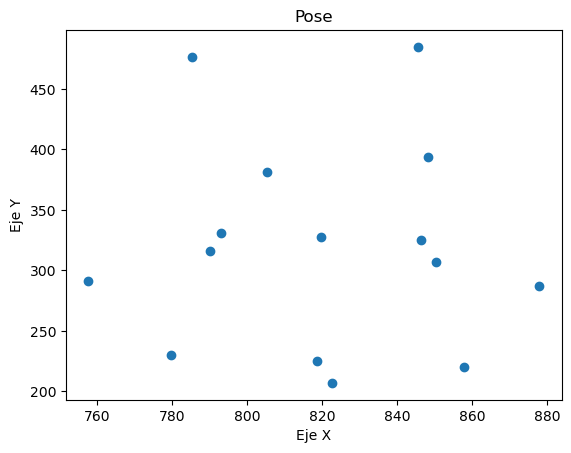

[[822.65564    818.83911133 857.9586     779.71967    877.9954
  757.7746     850.3255     790.2151     846.509      793.0775
  819.79321289 848.4173     805.4813     845.55493    785.4445    ]
 [206.9121     225.10900879 220.32034    229.89766    287.36154
  291.19247    306.5162     316.09354    324.7131     330.45947
  327.58630371 393.66977    381.21927    484.65433    476.03473   ]]
[[822.65564    206.9121    ]
 [818.83911133 225.10900879]
 [857.9586     220.32034   ]
 [779.71967    229.89766   ]
 [877.9954     287.36154   ]
 [757.7746     291.19247   ]
 [850.3255     306.5162    ]
 [790.2151     316.09354   ]
 [846.509      324.7131    ]
 [793.0775     330.45947   ]
 [819.79321289 327.58630371]
 [848.4173     393.66977   ]
 [805.4813     381.21927   ]
 [845.55493    484.65433   ]
 [785.4445     476.03473   ]]


In [65]:
for i in range(0, 600, 200):
    csv_name = csvs[0]
    my_csv = open_csv(csv_name)

    positions= get_positions_from_df(my_csv, i)
    plot_point(positions, True)
    plt.show()
    print(positions)
    positions = np.transpose(positions)
    print(positions)

Funciones para obtener el esqueleto y dibujarlo

In [66]:
def get_bone(df, body_part1, body_part2, frame = None):
    x1, y1 = get_position(df, body_part1, frame)
    x2, y2 = get_position(df, body_part2, frame)
    return [x1, x2], [y1, y2]

def get_skeleton(df, frame = None):
    bones = []
    for bone1, bone2 in bones_names:
        bones.append(get_bone(df, bone1, bone2, frame))
    return bones

def plot_skeleton(skeleton):
    for bone in skeleton:
        plt.plot([bone[0][0], bone[0][1]], [bone[1][0], bone[1][1]])


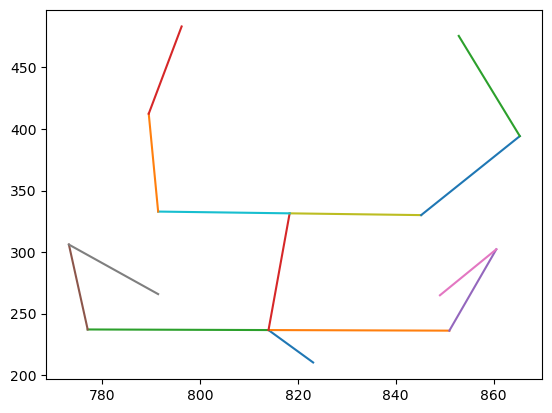

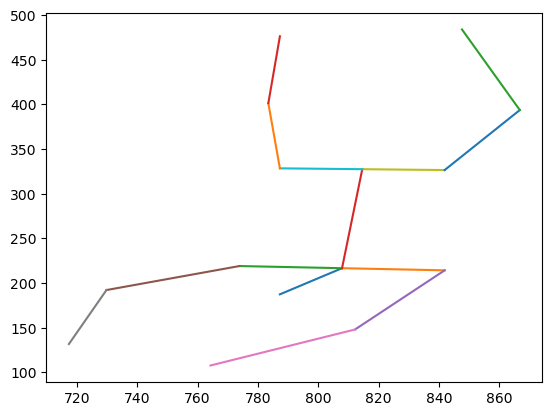

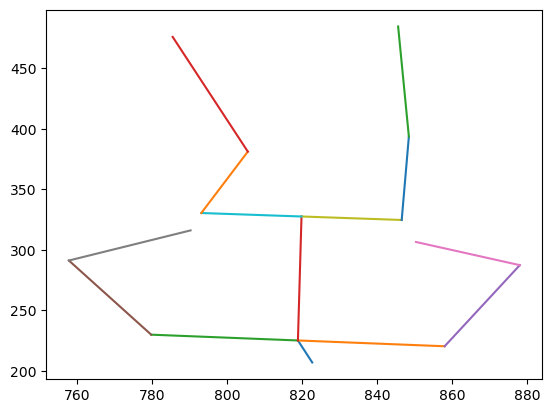

In [67]:
for i in range(0, 600, 200):
    #print(i)
    csv_name = csvs[0]
    my_csv = open_csv(csv_name)

    #plot_point(x, y, False)
    skeleton = get_skeleton(my_csv,i)
    plot_skeleton(skeleton)
    plt.show()

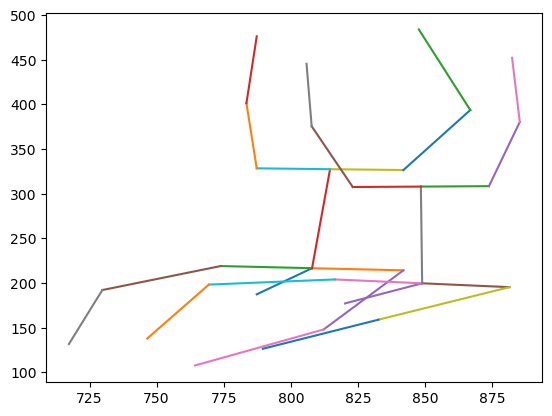

In [68]:
csv_name_1 = csvs[0]
my_csv_1 = open_csv(csv_name_1)

csv_name_2 = csvs[3]
#csv_name_2 = csvs[10]
my_csv_2 = open_csv(csv_name_2)

#plot_point(x, y, False)
skeleton_1 = get_skeleton(my_csv_1,200)
plot_skeleton(skeleton_1)
#plt.show()
skeleton_2 = get_skeleton(my_csv_2,200)
plot_skeleton(skeleton_2)
plt.show()

In [69]:

def get_bounding_box(positions, origin: tuple[float, float], point:int):

    result = list()
    difference = positions[point] - origin
        
    result = positions - difference
        
    result[point] = origin
    return result


def normalize(positions):
    #print(np.linalg.norm(positions))
    normalized = positions/np.linalg.norm(positions)
    return normalized

def cosine_similarity(positions1, positions2) -> float:
    dot_product = np.dot(positions1, positions2)
    magnitude_A = np.linalg.norm(positions1)
    magnitude_B = np.linalg.norm(positions2)
    if (magnitude_A * magnitude_B == 0):
        return 1
    return dot_product / (magnitude_A * magnitude_B)


def distance_cosine_similarity(positions1, positions2):
    cosine = []
    positions1 = np.transpose(positions1.copy())
    positions2 = np.transpose(positions2.copy())
    
    for i in range (0, len(positions1)):
        pos1 = positions1[:][i]
        pos2 = positions2[:][i]
        cosine_distance = cosine_similarity(pos1, pos2)
        cosine.append(cosine_distance)
    #print(pos1)
    similarity = np.mean(cosine)
    a = 1 - similarity
    a = round(a, 6)
    distance:float = 2 * (a)
    square_distance = math.sqrt(distance)
    return 1 - square_distance

Cosine similarity =  0.7897335024308437


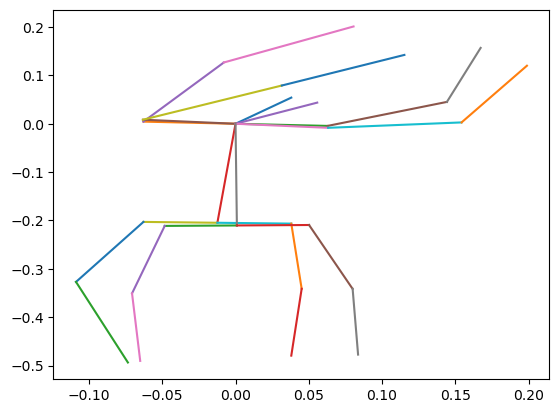

In [70]:
frame1 = 200
frame2 = 200

#my_csv_1 = my_csv_2


positions1 = get_positions_from_df(my_csv_1, frame1)
positions2 = get_positions_from_df(my_csv_2, frame2)

my_csv_1_copy = my_csv_1.copy()
my_csv_2_copy = my_csv_2.copy()

origin = (0,0)
point = 1

positions1 = np.transpose(positions1)
positions2 = np.transpose(positions2)

# print(positions1)
# print(positions2)

positions1 = get_bounding_box(positions1,origin,point)
positions2 = get_bounding_box(positions2,origin,point)

positions1 = np.transpose(positions1)
positions2 = np.transpose(positions2)

# print(positions1)
# print(positions2)

normalized_1 = normalize(positions1 * -1)
normalized_2 = normalize(positions2 * -1)

positions1 = np.transpose(positions1)
positions2 = np.transpose(positions2)

set_positions_from_df(my_csv_1_copy, frame1, normalized_1)
set_positions_from_df(my_csv_2_copy, frame2, normalized_2)

skeleton_normalized_1 = get_skeleton(my_csv_1_copy, frame1)
skeleton_normalized_2 = get_skeleton(my_csv_2_copy, frame2)

plot_skeleton(skeleton_normalized_1)
plot_skeleton(skeleton_normalized_2)

cont = 0
normalized_1_re= normalized_1.reshape(1, -1)
normalized_2_re= normalized_2.reshape(1, -1)
for i in normalized_1_re[0]:
    cont += i**2
#print(cont)
#print(normalized_1)

normalized_1 = np.transpose(normalized_1)
normalized_2 = np.transpose(normalized_2)

a = distance_cosine_similarity(normalized_1, normalized_2)
print("Cosine similarity = ", a)


In [71]:
frame1 = 200
frame2 = 200

#my_csv_1 = my_csv_2

def comparation(my_csv1, my_csv2, frame1:int, frame2:int):
    #my_csv_1 = my_csv_2
    positions1 = get_positions_from_df(my_csv1, frame1)
    positions2 = get_positions_from_df(my_csv2, frame2)

    my_csv1_copy = my_csv1.copy()
    my_csv2_copy = my_csv2.copy()

    origin = (0,0)
    point = 1

    positions1 = np.transpose(positions1)
    positions2 = np.transpose(positions2)

    positions1 = get_bounding_box(positions1,origin,point)
    positions2 = get_bounding_box(positions2,origin,point)

    positions1 = np.transpose(positions1)
    positions2 = np.transpose(positions2)

    normalized1 = normalize(positions1 * -1)
    normalized2 = normalize(positions2 * -1)

    set_positions_from_df(my_csv1_copy, frame1, normalized1)
    set_positions_from_df(my_csv2_copy, frame2, normalized2)

    a = distance_cosine_similarity(normalized1, normalized2)
    return (a, normalized1, normalized2)

In [72]:
csv_name_1 = csvs[0]
my_csv1 = open_csv(csv_name_1)

csv_name_2 = csvs[1]
my_csv2 = open_csv(csv_name_2)
#my_csv2 = my_csv1.copy()

0 0.8449322728611786


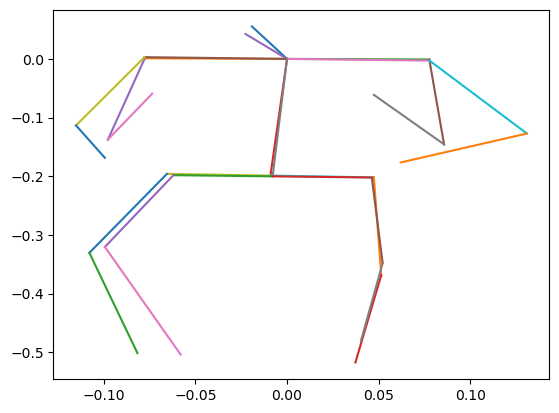

In [73]:
max = 0
cont = 0
normalized1 = []
normalized2 = []
for i in range(0, 200):
    #print("i = ", i, end=" ")
    temp, normalized1, normalized2 = comparation(my_csv1, my_csv2, i, i)
    if temp > max:
        max = temp
        cont = i
    
    if not i == 1:
        break

#print()
my_csv1_copy = my_csv1.copy()
my_csv2_copy = my_csv2.copy()

set_positions_from_df(my_csv1_copy, cont, normalized1)
set_positions_from_df(my_csv2_copy, cont, normalized2)

print(cont, max)

skeleton_normalized_1 = get_skeleton(my_csv1_copy, cont)
skeleton_normalized_2 = get_skeleton(my_csv2_copy, cont)

plot_skeleton(skeleton_normalized_1)
plot_skeleton(skeleton_normalized_2)
    

130 0.8875366726439236


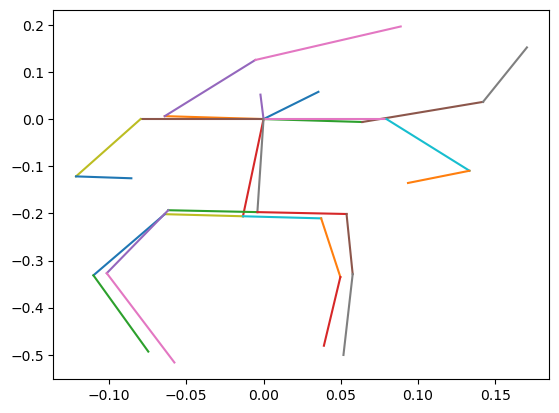

In [74]:
max = 0
cont = 0
cont2 = 0
normalized1 = []
normalized2 = []
for i in range(0, 200, 10):
    #print("i = ", i)
    for j in range(0,20,2):
        #print("j = ", j, end=" ")
        temp, normalized1, normalized2 = comparation(my_csv1, my_csv2, i, j)
        if temp > max:
            max = temp
            cont = i
            cont2 = j
    #print()

#print()
my_csv1_copy = my_csv1.copy()
my_csv2_copy = my_csv2.copy()

set_positions_from_df(my_csv1_copy, cont, normalized1)
set_positions_from_df(my_csv2_copy, cont2, normalized2)

print(cont, max)

skeleton_normalized_1 = get_skeleton(my_csv1_copy, cont)
skeleton_normalized_2 = get_skeleton(my_csv2_copy, cont2)

plot_skeleton(skeleton_normalized_1)
plot_skeleton(skeleton_normalized_2)

In [75]:
class Skeleton:
    def __init__(self, df, frame = 0):
        self.body_names = body
        self.ang_names = ang
        self.bones_names = bones_names
        self.df = df
        self.actual_frame = frame
    
    def get_position(self, body_part, frame = None):
        if frame is None:
            frame = self.actual_frame
        x = self.df[body_part + "_x"][frame] * -1
        y = self.df[body_part + "_y"][frame] * -1
        return x, y

    def get_bone(self, body_part1, body_part2, frame = None):
        x1, y1 = self.get_position(body_part1, frame)
        x2, y2 = self.get_position(body_part2, frame)
        return [x1, x2], [y1, y2]
    
    def get_positions(self, frame = None):
        positions = []
        positionsx = []
        positionsy = []

        for part in body:
            x, y = self.get_position(part, frame)
            positionsx.append(x) 
            positionsy.append(y)
        
        positions.append(positionsx)
        positions.append(positionsy)
        positions = np.array(positions).reshape(2, len(body))
        print(positions)
        return positions
    
    def plot_positions(self, show: bool = True, frame = None):
        x, y = self.get_positions(frame)
        plt.scatter(x,y, marker='o')
        plt.xlabel('Eje X')
        plt.ylabel('Eje Y')
        plt.title('Pose')
        
        if show:
            plt.show()

    def get_skeleton(self, frame = None):
        bones = []
        for bone1, bone2 in self.bones_names:
            bones.append(self.get_bone(bone1, bone2))
        return bones
    
    def plot_skeleton(self, frame = None):
        for bone in self.get_skeleton(frame):
            plt.plot([bone[0][0], bone[0][1]], [bone[1][0], bone[1][1]])

In [76]:
skeleton = Skeleton(df, 0)
skeleton.plot_positions(True)
skeleton.plot_skeleton()

NameError: name 'df' is not defined